In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image



from tensorflow import keras
from tensorflow.keras import layers 

In [2]:
data_train_path = r'C:\Users\layan\Downloads\Numbered Frames\Numbered Frames\Training'
#data_validation_path=r'C:\Users\layan\OneDrive\Documents\AI\validation'
data_test_path= r'C:\Users\layan\Downloads\Numbered Frames\Numbered Frames\Testing'

In [3]:
size = 224
width=224;
height=224;
batch_size = 64

In [4]:
# Define the target size as a tuple
target_size = (width, height)  # Replace 'width' and 'height' with your desired dimensions

# Create the image data generator
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    # Add other preprocessing options as needed
    
)

# Create the data generator
data_generator = image_data_generator.flow_from_directory(
    r'C:\Users\layan\Downloads\Numbered Frames\Numbered Frames\Training',
    
    target_size=target_size,  # Pass the tuple as the target_size parameter
    batch_size=batch_size,
    class_mode='categorical'  # Set to 'categorical' if you have multiple classes
)


Found 0 images belonging to 0 classes.


In [5]:

# Load the data
df = pd.read_csv(r"C:\Users\layan\Downloads\TrainingLabels.csv")


In [6]:
x=df[["id"]].values

In [7]:
y=df[["Classification"]].values

In [8]:
data_train = dict(
    
    directory=r'C:\Users\layan\Downloads\Numbered Frames\Numbered Frames\Training',
    x_col="image_name",
    y_col="Classification",
    weight_col=None,
    target_size=(size, size),
    color_mode='rgb',
    class_mode="raw",
    batch_size=batch_size,
    shuffle=True,
   
    seed=0,
)

In [9]:
df['image_name'] = df['id'].map('seq_{:06d}.jpg'.format)

In [10]:
df.describe()

,id
count,1600.00000
mean,1200.50000
std,462.02453
min,401.00000
25%,800.75000
50%,1200.50000
75%,1600.25000
max,2000.00000


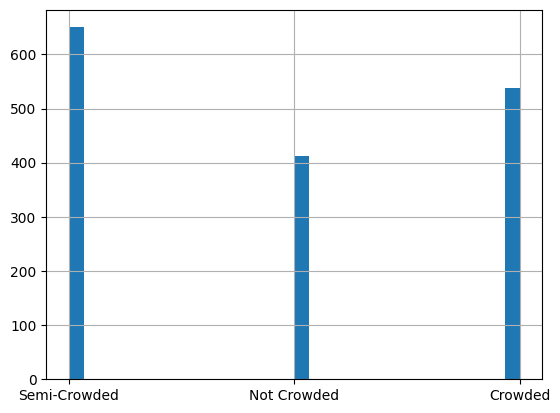

In [11]:
df['Classification'].hist(bins=30);

In [12]:
from tensorflow.keras import layers, models

In [14]:
# Initialize lists to store image data and labels
X_train_list = []
Y_train_list = []

# Load CSV data
csv_data1 = pd.read_csv(r"C:\Users\layan\Downloads\TrainingLabels.csv")
image_dir = r'C:\Users\layan\Downloads\Numbered Frames\Numbered Frames\Training'

# Iterate over each row in the CSV data
for index, row in csv_data1.iterrows():
    #print(f"Processing row {index + 1}")
    # Construct image file path with padded integer part starting from 401
    image_filename = f'seq_{index + 401:06d}.jpg'
    image_path = os.path.join(image_dir, image_filename)

    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Image file '{image_path}' not found. Skipping.")
        continue

    # Load image and convert to array
    image = Image.open(image_path)
    image_array = np.array(image)

    # Append image array to X_train_list
    X_train_list.append(image_array)
    
    # Append classification label to Y_train_list
    Y_train_list.append(row['Classification'])

    if index == 1599:  # Assuming there are 1600 rows in the CSV
        print("Loop completed all iterations.")

# Convert lists to NumPy arrays
X_train = np.array(X_train_list)
Y_train = np.array(Y_train_list)

#print("Number of images in X_train:", len(X_train))


Loop completed all iterations.


In [15]:
X_train.shape

(1600, 480, 640, 3)

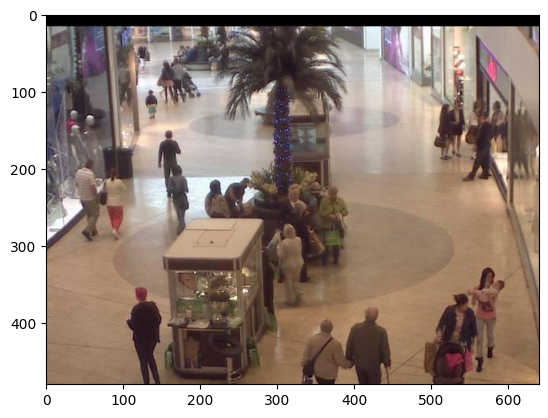

In [16]:
plt.imshow(X_train[1])

In [17]:
Y_train[:10]

array(['Semi-Crowded', 'Semi-Crowded', 'Semi-Crowded', 'Not Crowded',
       'Not Crowded', 'Semi-Crowded', 'Semi-Crowded', 'Semi-Crowded',
       'Semi-Crowded', 'Crowded'], dtype='<U12')

In [18]:
Y_train=Y_train.reshape(-1,)


In [19]:
classes = ['Not Crowded', 'Semi-Crowded', 'Crowded']

In [20]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel((y[index]))

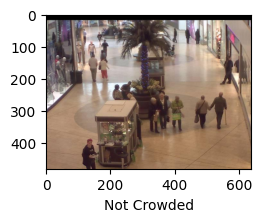

In [21]:
plot_sample(X_train, Y_train, 4)


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical values
Y_train = label_encoder.fit_transform(Y_train)

# Print the encoded labels
print("Encoded Labels:", Y_train)


Encoded Labels: [2 2 2 ... 1 1 1]


In [23]:
Y_train[0:40]

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
X_train=X_train/255 #for normalizing

In [25]:
# Initialize lists to store image data and labels
X_test_list = []
Y_test_list = []

# Load CSV data for testing
csv_data_test = pd.read_csv(r"C:\Users\layan\Downloads\TestingLabels.csv")  # Assuming different CSV for testing
image_dir_test = r'C:\Users\layan\Downloads\Numbered Frames\Numbered Frames\Testing'  # Change the directory path for testing images

# Iterate over each row in the CSV data for testing
for index, row in csv_data_test.iterrows():
    if index >= 400:
        break  # Stop the loop when index reaches 400
        
    # Construct image file path with padded integer part starting from 1
    image_filename = f'seq_{index + 1:06d}.jpg'  # Start index from 1 for testing
    image_path = os.path.join(image_dir_test, image_filename)

    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Image file '{image_path}' not found. Skipping.")
        continue

    # Load image and convert to array
    image = Image.open(image_path)
    image_array = np.array(image)

    # Append image array to X_test_list
    X_test_list.append(image_array)
    
    # Append classification label to Y_test_list
    Y_test_list.append(row['Classification'])

# Convert lists to NumPy arrays
X_test = np.array(X_test_list)
Y_test = np.array(Y_test_list)


In [26]:
Y_test[:10]

array(['Crowded', 'Crowded', 'Crowded', 'Crowded', 'Crowded', 'Crowded',
       'Crowded', 'Crowded', 'Semi-Crowded', 'Not Crowded'], dtype='<U12')

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical values
Y_test= label_encoder.fit_transform(Y_test)

# Print the encoded labels
#print("Encoded Labels:", Y_test)


In [28]:
Y_test[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 1], dtype=int64)

In [29]:
X_test=X_test/255 #for normalizing

In [59]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential([
    # CNN layers
    # First Convolutional Layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Second Convolutional Layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),  # Removed input_shape
    MaxPooling2D((2, 2)),
    
    # Dense layers
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Train the model
cnn.fit(X_train, Y_train, epochs=10,validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.3079 - loss: 8.5178 - val_accuracy: 0.6594 - val_loss: 0.9514
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.7077 - loss: 0.8047 - val_accuracy: 0.5063 - val_loss: 0.9524
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8143 - loss: 0.5164 - val_accuracy: 0.7156 - val_loss: 0.6632
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9214 - loss: 0.2391 - val_accuracy: 0.6156 - val_loss: 0.7548
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9719 - loss: 0.1639 - val_accuracy: 0.6719 - val_loss: 0.7318
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9906 - loss: 0.0574 - val_accuracy: 0.6938 - val_loss: 0.6812
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9962 - loss: 0.0286 - val_accuracy: 0.7156 - val_loss: 0.7330
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.7125 - val_loss

In [53]:
from sklearn.metrics import mean_absolute_error

# Predict probabilities
Y_predict_prob = cnn.predict(X_test)

# Convert probabilities to class labels
Y_predict = np.argmax(Y_predict_prob, axis=1)

# Calculate mean absolute error
mae = mean_absolute_error(Y_test, Y_predict)
print(f'MAE: {mae}')

# Calculate accuracy
accuracy = 100 * (1 - (mae / Y_test.mean()))
print(f'Accuracy: {accuracy:.1f}%')

# Evaluate loss
loss = cnn.evaluate(X_test, Y_test)[0]
print(f'Loss: {loss:.1f}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step
MAE: 0.425
Accuracy: 58.2%
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step - accuracy: 0.7743 - loss: 0.7052
Loss: 0.8
